# 11. 實例

In [30]:
%pylab inline 
from sympy import *
init_printing(use_unicode = True)

Populating the interactive namespace from numpy and matplotlib



## 11.1 使用 Poisson 混和合成影像
### 11.1.1 Poisson 混合演算法

In [7]:
offset_x, offset_y = -36, 42
src = plt.imread('vinci_src.png', 1)
dst = plt.imread('vinci_target.png', 1)
mask = plt.imread('vinci_mask.png', 0)
src_mask = (mask > 128).astype(np.uint8)

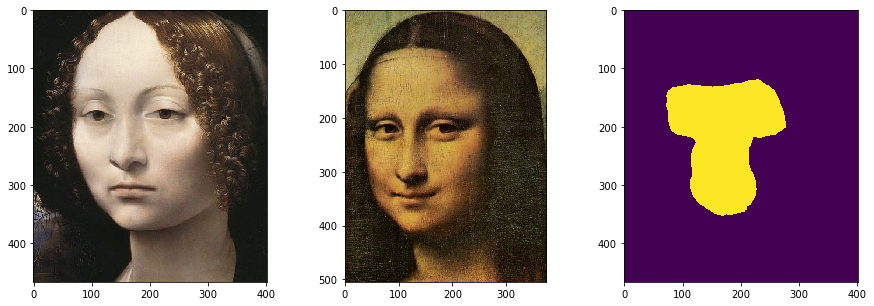

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(131).imshow(src)
plt.subplot(132).imshow(dst)
plt.subplot(133).imshow(src_mask);

In [24]:
mask.shape

(467, 401)

In [15]:
src_mask.shape

(467, 401)

In [16]:
src_y, src_x = np.where(src_mask)
# If only `condition` is given, return the tuple ``condition.nonzero()``, the indices where `condition` is True.
# src_laplacian = plt.la

## 11.2 經典力學模擬
### 11.2.1 懸鏈線
$y = a \, \cosh \frac{x}{a}$

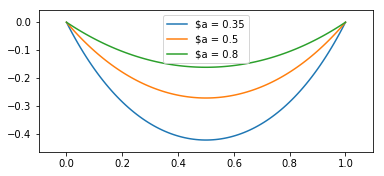

In [50]:
def catenary(x, a):
    return a * np.cosh((x - 0.5) / a) - a * np.cosh((-0.5)/a)
#     return a * np.cosh(x / a)  
#     return a * np.cosh(np.full( x.shape, -.5) / a) 


x = np.linspace(0, 1, 100)
# x = np.linspace(-0.5, 0.5, 100)
for a in [0.35, 0.5, 0.8]:
    plt.plot(x, catenary(x, a), label = '$a = {:g}'.format(a))
    
ax = plt.gca()
ax.set_aspect('equal')
ax.legend()
plt.margins(0.1)

#### 曲線長度
$s = \int_0^1 \sqrt{1 + \left(\frac{dy}{dx} \right) ^2 \, dx}$

In [36]:
y = catenary(x, 0.35)
np.sqrt(np.diff(y)**2 + np.diff(x)**2).sum()  # 懸鏈線的長度

In [53]:
from scipy import integrate

x, a = symbols('x, a', real = True)
y = a * cosh((x - S(1)/2)/a)  # 懸鏈線的函數
s = sqrt(y.diff(x)**2 + 1)
fs = lambdify((x, a), s, modules = 'math')

def catenary_length(a):
    return integrate.quad(lambda x: fs(x, a), 0, 1)

l = catenary_length(0.35)[0]
l